# Artificial Intelligence Nanodegree
## Machine Translation Project
In this notebook, sections that end with **'(IMPLEMENTATION)'** in the header indicate that the following blocks of code will require additional functionality which you must provide. Please be sure to read the instructions carefully!

## Introduction
In this notebook, you will build a deep neural network that functions as part of an end-to-end machine translation pipeline. Your completed pipeline will accept English text as input and return the French translation.

- **Preprocess** - You'll convert text to sequence of integers.
- **Models** Create models which accepts a sequence of integers as input and returns a probability distribution over possible translations. After learning about the basic types of neural networks that are often used for machine translation, you will engage in your own investigations, to design your own model!
- **Prediction** Run the model on English text.

## Dataset
We begin by investigating the dataset that will be used to train and evaluate your pipeline.  The most common datasets used for machine translation are from [WMT](http://www.statmt.org/).  However, that will take a long time to train a neural network on.  We'll be using a dataset we created for this project that contains a small vocabulary.  You'll be able to train your model in a reasonable time with this dataset.
### Load Data
The data is located in `data/small_vocab_en` and `data/small_vocab_fr`. The `small_vocab_en` file contains English sentences with their French translations in the `small_vocab_fr` file. Load the English and French data from these files from running the cell below.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import helper

# Load English data
english_sentences = helper.load_data('data/small_vocab_en')
# Load French data
french_sentences = helper.load_data('data/small_vocab_fr')

print('Dataset Loaded')

print((english_sentences[1]))
print((french_sentences[1]))

Dataset Loaded
the united states is usually chilly during july , and it is usually freezing in november .
les Ã©tats-unis est gÃ©nÃ©ralement froid en juillet , et il gÃ¨le habituellement en novembre .


### Files
Each line in `small_vocab_en` contains an English sentence with the respective translation in each line of `small_vocab_fr`.  View the first two lines from each file.

In [3]:
for sample_i in range(2):
    print('small_vocab_en Line {}:  {}'.format(sample_i + 1, english_sentences[sample_i]))
    print('small_vocab_fr Line {}:  {}'.format(sample_i + 1, french_sentences[sample_i]))

small_vocab_en Line 1:  new jersey is sometimes quiet during autumn , and it is snowy in april .
small_vocab_fr Line 1:  new jersey est parfois calme pendant l' automne , et il est neigeux en avril .
small_vocab_en Line 2:  the united states is usually chilly during july , and it is usually freezing in november .
small_vocab_fr Line 2:  les Ã©tats-unis est gÃ©nÃ©ralement froid en juillet , et il gÃ¨le habituellement en novembre .


From looking at the sentences, you can see they have been preprocessed already.  The puncuations have been delimited using spaces. All the text have been converted to lowercase.  This should save you some time, but the text requires more preprocessing.
### Vocabulary
The complexity of the problem is determined by the complexity of the vocabulary.  A more complex vocabulary is a more complex problem.  Let's look at the complexity of the dataset we'll be working with.

In [4]:
import collections


english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('{} English words.'.format(len([word for sentence in english_sentences for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in french_sentences for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1823250 English words.
227 unique English words.
10 Most common words in the English dataset:
"is" "," "." "in" "it" "during" "the" "but" "and" "sometimes"

1961295 French words.
355 unique French words.
10 Most common words in the French dataset:
"est" "." "," "en" "il" "les" "mais" "et" "la" "parfois"


For comparison, _Alice's Adventures in Wonderland_ contains 2,766 unique words of a total of 15,500 words.
## Preprocess
For this project, you won't use text data as input to your model. Instead, you'll convert the text into sequences of integers using the following preprocess methods:
1. Tokenize the words into ids
2. Add padding to make all the sequences the same length.

Time to start preprocessing the data...
### Tokenize (IMPLEMENTATION)
For a neural network to predict on text data, it first has to be turned into data it can understand. Text data like "dog" is a sequence of ASCII character encodings.  Since a neural network is a series of multiplication and addition operations, the input data needs to be number(s).

We can turn each character into a number or each word into a number.  These are called character and word ids, respectively.  Character ids are used for character level models that generate text predictions for each character.  A word level model uses word ids that generate text predictions for each word.  Word level models tend to learn better, since they are lower in complexity, so we'll use those.

Turn each sentence into a sequence of words ids using Keras's [`Tokenizer`](https://keras.io/preprocessing/text/#tokenizer) function. Use this function to tokenize `english_sentences` and `french_sentences` in the cell below.

Running the cell will run `tokenize` on sample data and show output for debugging.

In [5]:
import project_tests as tests
from keras.preprocessing.text import Tokenizer


def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(x)
    tokenized_sentences = tokenizer.texts_to_sequences(x)

    return tokenized_sentences, tokenizer

tests.test_tokenize(tokenize)

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

Using TensorFlow backend.


{'my': 4, 'is': 5, 'a': 3, 'dog': 16, 'this': 8, 'by': 9, 'fox': 17, 'won': 11, 'lazy': 6, 'jumps': 18, 'over': 14, 'sentence': 15, 'study': 12, 'brown': 7, 'lexicography': 10, 'short': 13, 'quick': 1, 'the': 2, 'jove': 19, 'of': 20, 'prize': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [2, 1, 7, 17, 18, 14, 2, 6, 16]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [9, 19, 4, 1, 12, 20, 10, 11, 3, 21]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [8, 5, 3, 13, 15]


### Padding (IMPLEMENTATION)
When batching the sequence of word ids together, each sequence needs to be the same length.  Since sentences are dynamic in length, we can add padding to the end of the sequences to make them the same length.

Make sure all the English sequences have the same length and all the French sequences have the same length by adding padding to the **end** of each sequence using Keras's [`pad_sequences`](https://keras.io/preprocessing/sequence/#pad_sequences) function.

In [6]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences


def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    return pad_sequences(x,padding='post',maxlen=length)

tests.test_pad(pad)

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [ 2  1  7 17 18 14  2  6 16]
  Output: [ 2  1  7 17 18 14  2  6 16  0]
Sequence 2 in x
  Input:  [ 9 19  4  1 12 20 10 11  3 21]
  Output: [ 9 19  4  1 12 20 10 11  3 21]
Sequence 3 in x
  Input:  [ 8  5  3 13 15]
  Output: [ 8  5  3 13 15  0  0  0  0  0]


### Preprocess Pipeline
Your focus for this project is to build neural network architecture, so we won't ask you to create a preprocess pipeline.  Instead, we've provided you with the implementation of the `preprocess` function.

In [7]:
from keras.utils.np_utils import to_categorical

def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize(x)
    preprocess_y, y_tk = tokenize(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

    #if preprocess_x.shape[1] > preprocess_y.shape[1]:
    #    preprocess_y = pad(preprocess_y, preprocess_x.shape[1])
    #elif preprocess_x.shape[1] < preprocess_y.shape[1]:
    #    preprocess_x = pad(preprocess_x, preprocess_y.shape[1])

    # Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)
    
    #total_tokens = len(y_tk.word_index) + 1
    #preprocess_y = np.array([to_categorical(preprocess_y[i],total_tokens) for i in range(len(preprocess_y))])

    return preprocess_x, preprocess_y, x_tk, y_tk

preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    preprocess(english_sentences, french_sentences)

print('Data Preprocessed')

Data Preprocessed


In [8]:
print(preproc_english_sentences[1])
print(preproc_french_sentences[1])

[ 5 21 20  1  9 62  4 43  7  3  1  9 51  2 45]
[[ 4]
 [32]
 [31]
 [ 1]
 [12]
 [19]
 [ 2]
 [49]
 [ 6]
 [ 3]
 [95]
 [69]
 [ 2]
 [51]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]]


## Models
In this section, you will experiment with various neural network architectures.
You will begin by training four relatively simple architectures.
- Model 1 is a simple RNN
- Model 2 is a RNN with Embedding
- Model 3 is a Bidirectional RNN
- Model 4 is an optional Encoder-Decoder RNN

After experimenting with the four simple architectures, you will construct a deeper architecture that is designed to outperform all four models.
### Ids Back to Text
The neural network will be translating the input to words ids, which isn't the final form we want.  We want the French translation.  The function `logits_to_text` will bridge the gab between the logits from the neural network to the French translation.  You'll be using this function to better understand the output of the neural network.

In [9]:
def logits_to_text(logits, tokenizer):
    """
    Turn logits from a neural network into text using the tokenizer
    :param logits: Logits from a neural network
    :param tokenizer: Keras Tokenizer fit on the labels
    :return: String that represents the text of the logits
    """
    index_to_words = {id: word for word, id in tokenizer.word_index.items()}
    index_to_words[0] = '<PAD>'

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

print('`logits_to_text` function loaded.')

`logits_to_text` function loaded.


### Model 1: RNN (IMPLEMENTATION)
![RNN](images/rnn.png)
A basic RNN model is a good baseline for sequence data.  In this model, you'll build a RNN that translates English to French.

In [10]:
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2], 1))
print(tmp_x.shape)

(137861, 21, 1)


In [11]:
from keras.layers import GRU, Input, Dense, TimeDistributed, LSTM
from keras.models import Model, Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

def simple_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size, learning_rate=0.1):
    """
    Build and train a basic RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Build the layers
    model = Sequential()
    model.add(LSTM(output_sequence_length, input_shape=input_shape[1:], return_sequences=True))
    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

tests.test_simple_model(simple_model)

# Train the neural network
simple_rnn_model = simple_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1, # Add a code for padding
    len(french_tokenizer.word_index) + 1,
    learning_rate=0.005 # Lowered learning rate for better fit
)

print(simple_rnn_model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 21, 21)            1932      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 21, 346)           7612      
Total params: 9,544.0
Trainable params: 9,544
Non-trainable params: 0.0
_________________________________________________________________
None


In [12]:
print(preproc_french_sentences.shape)

from keras.callbacks import EarlyStopping

simple_rnn_model.fit(
    tmp_x, 
    preproc_french_sentences, 
    batch_size=36762, epochs=10, validation_split=0.2#,
    #callbacks = [EarlyStopping(monitor='val_acc', patience=3, mode='max')]
)

(137861, 21, 1)
Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 3s - loss: 11.5894 - acc: 0.0117 - val_loss: 8.0406 - val_acc: 0.1316
Epoch 2/10
110288/110288 [==============================] - 2s - loss: 7.7235 - acc: 0.1976 - val_loss: 7.1691 - val_acc: 0.3215
Epoch 3/10
110288/110288 [==============================] - 2s - loss: 7.0291 - acc: 0.3506 - val_loss: 6.8691 - val_acc: 0.4167
Epoch 4/10
110288/110288 [==============================] - 2s - loss: 6.7895 - acc: 0.4273 - val_loss: 6.7963 - val_acc: 0.4422
Epoch 5/10
110288/110288 [==============================] - 2s - loss: 6.7667 - acc: 0.4466 - val_loss: 6.7393 - val_acc: 0.4207
Epoch 6/10
110288/110288 [==============================] - 2s - loss: 6.7421 - acc: 0.4148 - val_loss: 6.6994 - val_acc: 0.4082
Epoch 7/10
110288/110288 [==============================] - 2s - loss: 6.6890 - acc: 0.4070 - val_loss: 6.6715 - val_acc: 0.4079
Epoch 8/10
110288/110288 [===

In [13]:
# Print prediction(s)

def preview_sentence(sentence_index,input_x,model):
    print(model.predict(input_x[sentence_index:sentence_index+1]).shape)
    print('ENGLISH: ',english_sentences[sentence_index])
    print('FRENCH: ',
        logits_to_text(
            model.predict(input_x[sentence_index:sentence_index+1])[0],
            french_tokenizer
        )
    )
    pass

preview_sentence(13,tmp_x,simple_rnn_model)

print(tmp_x[0][0])

print()

(1, 21, 346)
ENGLISH:  that cat was my most loved animal .
FRENCH:  elle est est est est est est <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
[17]



### Model 2: Embedding (IMPLEMENTATION)
![RNN](images/embedding.png)
You've turned the words into ids, but there's a better representation of a word.  This is called word embeddings.  An embedding is a vector representation of the word that is close to similar words in n-dimensional space, where the n represents the size of the embedding vectors.

In this model, you'll create a RNN model using embedding.

In [14]:
from keras.layers.embeddings import Embedding

max_length = max(preproc_english_sentences.shape[1],preproc_french_sentences.shape[1])
padded_x = pad(preproc_english_sentences, max_length)


In [15]:
def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement
    model = Sequential()
    model.add(Embedding(
        input_length = input_shape[1],
        input_dim=english_vocab_size,
        output_dim = french_vocab_size
    ))
    
    model.add(LSTM(
        output_sequence_length,
        input_shape = input_shape[1:],
        return_sequences = True           
    ))
    
    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.summary()

    model.compile(loss=sparse_categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

    return model

tests.test_embed_model(embed_model)

embed_rnn = embed_model(
    padded_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,
    len(french_tokenizer.word_index) + 1
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21, 344)           68456     
_________________________________________________________________
lstm_3 (LSTM)                (None, 21, 21)            30744     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 21, 344)           7568      
Total params: 106,768.0
Trainable params: 106,768
Non-trainable params: 0.0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 21, 346)           69200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 21, 21)            30912     
_________________________________________________________________


In [16]:
# TODO: Train the neural network
embed_rnn.fit(
    padded_x,preproc_french_sentences,
    batch_size=36762, epochs=10, validation_split=0.2#,
    #callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
)


Train on 110288 samples, validate on 27573 samples
Epoch 1/10
110288/110288 [==============================] - 4s - loss: 9.0230 - acc: 0.0050 - val_loss: 5.2526 - val_acc: 0.4328
Epoch 2/10
110288/110288 [==============================] - 3s - loss: 4.9327 - acc: 0.4515 - val_loss: 4.2269 - val_acc: 0.4879
Epoch 3/10
110288/110288 [==============================] - 3s - loss: 4.0991 - acc: 0.4957 - val_loss: 3.7883 - val_acc: 0.5202
Epoch 4/10
110288/110288 [==============================] - 3s - loss: 3.6922 - acc: 0.5221 - val_loss: 3.4377 - val_acc: 0.5291
Epoch 5/10
110288/110288 [==============================] - 3s - loss: 3.3508 - acc: 0.5281 - val_loss: 3.1300 - val_acc: 0.5378
Epoch 6/10
110288/110288 [==============================] - 3s - loss: 3.0652 - acc: 0.5376 - val_loss: 2.8864 - val_acc: 0.5369
Epoch 7/10
110288/110288 [==============================] - 3s - loss: 2.8409 - acc: 0.5359 - val_loss: 2.7207 - val_acc: 0.5398
Epoch 8/10
110288/110288 [====================

In [17]:
# TODO: Print prediction(s)
preview_sentence(5,padded_x,embed_rnn)

(1, 21, 346)
ENGLISH:  his favorite fruit is the orange , but my favorite is the grape .
FRENCH:  gã©nã©ralement <PAD> <PAD> est est est <PAD> <PAD> <PAD> est est <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Model 3: Bidirectional RNNs (IMPLEMENTATION)
![RNN](images/bidirectional.png)
One restriction of a RNN is that it can't see the future input, only the past.  This is where bidirectional recurrent neural networks come in.  They are able to see the future data.

In [18]:
from keras.layers import Bidirectional

In [19]:
def bd_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a bidirectional RNN model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    model = Sequential()
    model.add(
        Bidirectional(
            LSTM(
                output_sequence_length,
                return_sequences=True
            ),
            input_shape=input_shape[1:],
            merge_mode='sum'
        )
    )

    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])

    model.summary()

    return model

tests.test_bd_model(bd_model)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 21, 21)            3864      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 21, 344)           7568      
Total params: 11,432.0
Trainable params: 11,432
Non-trainable params: 0.0
_________________________________________________________________


In [20]:

bd_rnn = bd_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,
    len(french_tokenizer.word_index) + 1
)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 21, 21)            3864      
_________________________________________________________________
time_distributed_6 (TimeDist (None, 21, 346)           7612      
Total params: 11,476.0
Trainable params: 11,476
Non-trainable params: 0.0
_________________________________________________________________


In [21]:
# TODO: Train and Print prediction(s)
bd_rnn.fit(tmp_x, preproc_french_sentences,
    batch_size=36762, epochs=20, validation_split=0.2#,
    #callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
)

Train on 110288 samples, validate on 27573 samples
Epoch 1/20
110288/110288 [==============================] - 5s - loss: 12.4813 - acc: 1.4076e-04 - val_loss: 9.3910 - val_acc: 0.0015
Epoch 2/20
110288/110288 [==============================] - 3s - loss: 8.9461 - acc: 0.0200 - val_loss: 7.9521 - val_acc: 0.0751
Epoch 3/20
110288/110288 [==============================] - 3s - loss: 7.8226 - acc: 0.0858 - val_loss: 7.4578 - val_acc: 0.1257
Epoch 4/20
110288/110288 [==============================] - 3s - loss: 7.3457 - acc: 0.1358 - val_loss: 6.8903 - val_acc: 0.1647
Epoch 5/20
110288/110288 [==============================] - 3s - loss: 6.8062 - acc: 0.1781 - val_loss: 6.4463 - val_acc: 0.2140
Epoch 6/20
110288/110288 [==============================] - 3s - loss: 6.3722 - acc: 0.2258 - val_loss: 6.1509 - val_acc: 0.2510
Epoch 7/20
110288/110288 [==============================] - 3s - loss: 6.0956 - acc: 0.2586 - val_loss: 5.9021 - val_acc: 0.2833
Epoch 8/20
110288/110288 [===============

In [22]:
preview_sentence(3,tmp_x,bd_rnn)

(1, 21, 346)
ENGLISH:  the united states is sometimes mild during june , and it is cold in september .
FRENCH:  est est est est est est est est est est <PAD> il <PAD> il <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Model 4: Encoder-Decoder (OPTIONAL)
Time to look at encoder-decoder models.  This model is made up of an encoder and decoder. The encoder creates a matrix representation of the sentence.  The decoder takes this matrix as input and predicts the translation as output.

Create an encoder-decoder model in the cell below.

In [23]:
from keras.layers import RepeatVector


def encdec_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train an encoder-decoder model on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # OPTIONAL: Implement
    model = Sequential()

    model.add(GRU(256,input_shape=input_shape[1:]))

    model.add(RepeatVector(output_sequence_length))

    model.add(GRU(256,input_shape=input_shape[1:], return_sequences = True))

    model.add(TimeDistributed(Dense(french_vocab_size)))

    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(0.003),
                  metrics=['accuracy'])

    model.summary()

    return model

tests.test_encdec_model(encdec_model)


# OPTIONAL: Train and Print prediction(s)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 256)               198144    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 21, 256)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 21, 256)           393984    
_________________________________________________________________
time_distributed_7 (TimeDist (None, 21, 344)           88408     
Total params: 680,536.0
Trainable params: 680,536.0
Non-trainable params: 0.0
_________________________________________________________________


### Model 5: Custom (IMPLEMENTATION)
Use everything you learned from the previous models to create a model that incorporates embedding and a bidirectional rnn into one model.

In [24]:
import project_tests as tests

from keras import backend as K
K.clear_session()

def model_final(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a model that incorporates embedding, encoder-decoder, and bidirectional RNN on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """

    model = Sequential()

    model.add(Embedding(
        input_length = input_shape[1],
        input_dim=english_vocab_size,
        output_dim = french_vocab_size
    ))
    
    # TODO: Implement encoder
    #model.add(GRU(input_shape[1]))
    #model.add(RepeatVector(output_sequence_length))

    model.add(
        Bidirectional(
            GRU(
                512,
                return_sequences=True
            ),
            merge_mode='sum'
        )
    )

    model.add(
        Bidirectional(
            GRU(
                french_vocab_size,
                return_sequences=True
            ),
            merge_mode='sum'
        )
    )


    #model.add(TimeDistributed(Dense()))

    model.compile(
        loss=sparse_categorical_crossentropy,
        optimizer=Adam(0.003),
        metrics=['accuracy']
    )

    model.summary()

    return model

#tests.test_model_final(model_final) # Test will fail without encoder-decoder

print('Final Model Loaded')

final_rnn = model_final(
    padded_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index) + 1,
    len(french_tokenizer.word_index) + 1
)

Final Model Loaded
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21, 346)           69200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 21, 512)           2638848   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 21, 346)           1783284   
Total params: 4,491,332.0
Trainable params: 4,491,332
Non-trainable params: 0.0
_________________________________________________________________


Train on 110288 samples, validate on 27573 samples
Epoch 1/2
110288/110288 [==============================] - 68s - loss: 3.2855 - acc: 0.4768 - val_loss: 1.5056 - val_acc: 0.6425
Epoch 2/2
110288/110288 [==============================] - 66s - loss: 1.4696 - acc: 0.6242 - val_loss: 1.1878 - val_acc: 0.6602


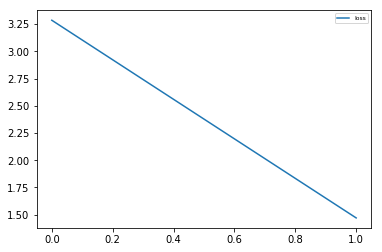

In [25]:
# This is a test run, full training below
import keras.callbacks

from matplotlib import pyplot as plt
from IPython.display import clear_output

# CODE FROM https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        # self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        # self.val_losses.append(logs.get('val_loss'))
        self.i += 1

    def on_train_end(self, logs=None):
        # clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        # plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend(prop={'size': 6})
        plt.show();


history = final_rnn.fit(
    padded_x, preproc_french_sentences,    
    batch_size=4000, epochs=2, validation_split=0.2,
    callbacks=[PlotLosses()]
)


In [26]:
preview_sentence(3,padded_x,final_rnn)

(1, 21, 346)
ENGLISH:  the united states is sometimes mild during june , and it is cold in september .
FRENCH:  les ã©tats unis est parfois doux en juin et il est est en septembre <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


## Prediction (IMPLEMENTATION)

In [ ]:
import numpy as np
import os.path
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.sequence import pad_sequences

from keras import backend as K
K.clear_session()

def final_predictions(x, y, x_tk, y_tk):
    """
    Gets predictions using the final model
    :param x: Preprocessed English data
    :param y: Preprocessed French data
    :param x_tk: English tokenizer
    :param y_tk: French tokenizer
    """
    # TODO: Train neural network using model_final
    x = pad(x,y.shape[1])

    model = model_final(
        padded_x.shape,
        y.shape[1],
        len(x_tk.word_index) + 1,
        len(y_tk.word_index) + 1
    )
    
    weight_path = 'weights.model_final5.hdf5'

    checkpointer = ModelCheckpoint(
        filepath=weight_path,
        save_best_only=True,
        monitor='acc',
        verbose=1
    )

    earlystopper = EarlyStopping(
        min_delta=0.0001,
        patience=200,
        #verbose=1,
        monitor='acc'
    )

    model.fit(
        x,y,
        # validation_split=0.2,
        batch_size=4000, # Push as much data as possible per batch as our GPU can handle
        epochs=10000,
        callbacks=[PlotLosses(),checkpointer,earlystopper]
    )

    model.load_weights(weight_path) # Reload best weights

    ## DON'T EDIT ANYTHING BELOW THIS LINE
    y_id_to_word = {value: key for key, value in y_tk.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = 'he saw a old yellow truck'
    sentence = [x_tk.word_index[word] for word in sentence.split()]
    sentence = pad_sequences([sentence], maxlen=x.shape[-1], padding='post')
    sentences = np.array([sentence[0], x[0]])
    predictions = model.predict(sentences, len(sentences))

    print('Sample 1:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
    print('Il a vu un vieux camion jaune')
    print('Sample 2:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))
    print(' '.join([y_id_to_word[np.argmax(x)] for x in y[0]]))


final_predictions(preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 21, 346)           69200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 21, 512)           2638848   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 21, 346)           1783284   
Total params: 4,491,332.0
Trainable params: 4,491,332
Non-trainable params: 0.0
_________________________________________________________________
Epoch 1/10000
137861/137861 [==============================] - 89s - loss: 4.6674 - acc: 0.3500    
Epoch 2/10000
137861/137861 [==============================] - 77s - loss: 3.1954 - acc: 0.4270    
Epoch 3/10000
137861/137861 [==============================] - 68s - loss: 2.2892 - acc: 0.4547    
Epoch 4/10000
137861/137861 [==============================] - 67s - loss: 1.9408 - acc: 0.4

137861/137861 [==============================] - 66s - loss: 1.0618 - acc: 0.6893    
Epoch 67/10000
137861/137861 [==============================] - 66s - loss: 0.9917 - acc: 0.7090    
Epoch 68/10000
137861/137861 [==============================] - 66s - loss: 0.9985 - acc: 0.7071    
Epoch 69/10000
137861/137861 [==============================] - 66s - loss: 0.8476 - acc: 0.7306    
Epoch 70/10000
137861/137861 [==============================] - 66s - loss: 0.8164 - acc: 0.7357    
Epoch 71/10000
137861/137861 [==============================] - 67s - loss: 0.7829 - acc: 0.7450    
Epoch 72/10000
137861/137861 [==============================] - 66s - loss: 0.8354 - acc: 0.7399    
Epoch 73/10000
137861/137861 [==============================] - 66s - loss: 0.7658 - acc: 0.7595    
Epoch 74/10000
137861/137861 [==============================] - 65s - loss: 0.7234 - acc: 0.7636    
Epoch 75/10000
137861/137861 [==============================] - 67s - loss: 0.7476 - acc: 0.7646    
Epoch

137861/137861 [==============================] - 66s - loss: 0.5752 - acc: 0.8182    
Epoch 102/10000
137861/137861 [==============================] - 66s - loss: 0.5435 - acc: 0.8313    
Epoch 103/10000
137861/137861 [==============================] - 66s - loss: 0.5156 - acc: 0.8387    
Epoch 104/10000
137861/137861 [==============================] - 66s - loss: 0.4903 - acc: 0.8438    
Epoch 105/10000
137861/137861 [==============================] - 66s - loss: 0.4820 - acc: 0.8481    
Epoch 106/10000
137861/137861 [==============================] - 66s - loss: 0.4812 - acc: 0.8500    
Epoch 107/10000
137861/137861 [==============================] - 66s - loss: 0.4639 - acc: 0.8545    
Epoch 108/10000
137861/137861 [==============================] - 66s - loss: 0.4924 - acc: 0.8526    
Epoch 109/10000
137861/137861 [==============================] - 66s - loss: 0.5614 - acc: 0.8160    
Epoch 110/10000
137861/137861 [==============================] - 66s - loss: 0.4920 - acc: 0.8435 

137861/137861 [==============================] - 65s - loss: 0.4699 - acc: 0.8595    
Epoch 172/10000
137861/137861 [==============================] - 66s - loss: 0.6045 - acc: 0.8101    
Epoch 173/10000
137861/137861 [==============================] - 66s - loss: 0.6129 - acc: 0.8280    
Epoch 174/10000
137861/137861 [==============================] - 65s - loss: 0.5847 - acc: 0.8197    
Epoch 175/10000
137861/137861 [==============================] - 66s - loss: 0.6147 - acc: 0.8150    
Epoch 176/10000
137861/137861 [==============================] - 66s - loss: 0.5035 - acc: 0.8446    
Epoch 177/10000
137861/137861 [==============================] - 66s - loss: 0.4453 - acc: 0.8577    
Epoch 178/10000
137861/137861 [==============================] - 66s - loss: 0.4379 - acc: 0.8612    
Epoch 179/10000
137861/137861 [==============================] - 65s - loss: 0.4194 - acc: 0.8707    
Epoch 180/10000
137861/137861 [==============================] - 66s - loss: 0.4241 - acc: 0.8675 

137861/137861 [==============================] - 66s - loss: 0.2594 - acc: 0.9389    
Epoch 242/10000
137861/137861 [==============================] - 66s - loss: 0.2398 - acc: 0.9434    
Epoch 243/10000
137861/137861 [==============================] - 65s - loss: 0.2382 - acc: 0.9448    
Epoch 244/10000
137861/137861 [==============================] - 66s - loss: 0.2391 - acc: 0.9444    
Epoch 245/10000
137861/137861 [==============================] - 66s - loss: 0.2585 - acc: 0.9378    
Epoch 246/10000
137861/137861 [==============================] - 66s - loss: 0.2596 - acc: 0.9380    
Epoch 247/10000
137861/137861 [==============================] - 67s - loss: 0.3168 - acc: 0.9255    
Epoch 248/10000
137861/137861 [==============================] - 66s - loss: 0.3776 - acc: 0.9064    
Epoch 249/10000
137861/137861 [==============================] - 65s - loss: 0.3129 - acc: 0.9240    
Epoch 250/10000
137861/137861 [==============================] - 67s - loss: 0.2858 - acc: 0.9314 

137861/137861 [==============================] - 66s - loss: 0.3326 - acc: 0.9314    
Epoch 315/10000
137861/137861 [==============================] - 65s - loss: 0.3845 - acc: 0.9213    
Epoch 316/10000
137861/137861 [==============================] - 66s - loss: 0.4136 - acc: 0.9125    
Epoch 317/10000
137861/137861 [==============================] - 65s - loss: 0.3507 - acc: 0.9257    
Epoch 318/10000
137861/137861 [==============================] - 66s - loss: 0.3257 - acc: 0.9319    
Epoch 319/10000
137861/137861 [==============================] - 66s - loss: 0.3227 - acc: 0.9330    
Epoch 320/10000
137861/137861 [==============================] - 66s - loss: 0.3643 - acc: 0.9230    
Epoch 321/10000
137861/137861 [==============================] - 65s - loss: 0.3610 - acc: 0.9235    
Epoch 322/10000
137861/137861 [==============================] - 66s - loss: 0.3351 - acc: 0.9305    
Epoch 323/10000
137861/137861 [==============================] - 66s - loss: 0.3256 - acc: 0.9335 

137861/137861 [==============================] - 66s - loss: 0.2748 - acc: 0.9441    
Epoch 389/10000
137861/137861 [==============================] - 66s - loss: 0.3393 - acc: 0.9303    
Epoch 390/10000
137861/137861 [==============================] - 66s - loss: 0.3034 - acc: 0.9384    
Epoch 391/10000
137861/137861 [==============================] - 66s - loss: 0.3021 - acc: 0.9408    
Epoch 392/10000
137861/137861 [==============================] - 66s - loss: 0.2836 - acc: 0.9450    
Epoch 393/10000
137861/137861 [==============================] - 66s - loss: 0.2699 - acc: 0.9479    
Epoch 394/10000
137861/137861 [==============================] - 66s - loss: 0.2857 - acc: 0.9446    
Epoch 395/10000
137861/137861 [==============================] - 66s - loss: 0.4318 - acc: 0.9110    
Epoch 396/10000
137861/137861 [==============================] - 65s - loss: 0.4204 - acc: 0.9105    
Epoch 397/10000
137861/137861 [==============================] - 66s - loss: 0.5466 - acc: 0.8846 

137861/137861 [==============================] - 66s - loss: 0.3153 - acc: 0.9303    
Epoch 463/10000
137861/137861 [==============================] - 67s - loss: 0.3144 - acc: 0.9307    
Epoch 464/10000
137861/137861 [==============================] - 66s - loss: 0.3113 - acc: 0.9316    
Epoch 465/10000
137861/137861 [==============================] - 67s - loss: 0.3083 - acc: 0.9322    
Epoch 466/10000
137861/137861 [==============================] - 66s - loss: 0.3136 - acc: 0.9309    
Epoch 467/10000
137861/137861 [==============================] - 66s - loss: 0.3146 - acc: 0.9304    
Epoch 468/10000
137861/137861 [==============================] - 66s - loss: 0.3393 - acc: 0.9226    
Epoch 469/10000
137861/137861 [==============================] - 67s - loss: 0.3195 - acc: 0.9281    
Epoch 470/10000
137861/137861 [==============================] - 66s - loss: 0.3126 - acc: 0.9307    
Epoch 471/10000
137861/137861 [==============================] - 66s - loss: 0.3097 - acc: 0.9317 

137861/137861 [==============================] - 66s - loss: 0.3033 - acc: 0.9354    
Epoch 537/10000
137861/137861 [==============================] - 67s - loss: 0.2942 - acc: 0.9376    
Epoch 538/10000
137861/137861 [==============================] - 66s - loss: 0.2880 - acc: 0.9395    
Epoch 539/10000
137861/137861 [==============================] - 66s - loss: 0.2998 - acc: 0.9376    
Epoch 540/10000
137861/137861 [==============================] - 66s - loss: 0.3388 - acc: 0.9291    
Epoch 541/10000
137861/137861 [==============================] - 66s - loss: 0.3464 - acc: 0.9281    
Epoch 542/10000
137861/137861 [==============================] - 66s - loss: 0.3255 - acc: 0.9331    
Epoch 543/10000
137861/137861 [==============================] - 66s - loss: 0.3177 - acc: 0.9346    
Epoch 544/10000
137861/137861 [==============================] - 66s - loss: 0.3063 - acc: 0.9374    
Epoch 545/10000
137861/137861 [==============================] - 67s - loss: 0.2972 - acc: 0.9399 

137861/137861 [==============================] - 66s - loss: 0.2866 - acc: 0.9421    
Epoch 574/10000
137861/137861 [==============================] - 66s - loss: 0.3509 - acc: 0.9301    
Epoch 575/10000
137861/137861 [==============================] - 66s - loss: 0.4270 - acc: 0.9088    
Epoch 576/10000
137861/137861 [==============================] - 66s - loss: 0.3615 - acc: 0.9235    
Epoch 577/10000
137861/137861 [==============================] - 66s - loss: 0.3349 - acc: 0.9315    
Epoch 578/10000
137861/137861 [==============================] - 66s - loss: 0.3202 - acc: 0.9349    
Epoch 579/10000
137861/137861 [==============================] - 66s - loss: 0.3109 - acc: 0.9369    
Epoch 580/10000
137861/137861 [==============================] - 66s - loss: 0.3125 - acc: 0.9360    
Epoch 581/10000
137861/137861 [==============================] - 66s - loss: 0.3266 - acc: 0.9344    
Epoch 582/10000
137861/137861 [==============================] - 66s - loss: 0.3076 - acc: 0.9386 

137861/137861 [==============================] - 66s - loss: 0.3019 - acc: 0.9426    
Epoch 648/10000
137861/137861 [==============================] - 67s - loss: 0.3015 - acc: 0.9427    
Epoch 649/10000
137861/137861 [==============================] - 66s - loss: 0.2972 - acc: 0.9435    
Epoch 650/10000
137861/137861 [==============================] - 66s - loss: 0.2959 - acc: 0.9437    
Epoch 651/10000
137861/137861 [==============================] - 66s - loss: 0.2953 - acc: 0.9438    
Epoch 652/10000
137861/137861 [==============================] - 66s - loss: 0.2907 - acc: 0.9448    
Epoch 653/10000
137861/137861 [==============================] - 66s - loss: 0.2878 - acc: 0.9455    
Epoch 654/10000
137861/137861 [==============================] - 66s - loss: 0.2887 - acc: 0.9454    
Epoch 655/10000
137861/137861 [==============================] - 66s - loss: 0.2896 - acc: 0.9454    
Epoch 656/10000
137861/137861 [==============================] - 67s - loss: 0.2898 - acc: 0.9454 

137861/137861 [==============================] - 66s - loss: 0.3580 - acc: 0.9283    
Epoch 722/10000
137861/137861 [==============================] - 66s - loss: 0.3336 - acc: 0.9335    
Epoch 723/10000
137861/137861 [==============================] - 66s - loss: 0.3521 - acc: 0.9303    
Epoch 724/10000
137861/137861 [==============================] - 66s - loss: 0.3449 - acc: 0.9318    
Epoch 725/10000
137861/137861 [==============================] - 66s - loss: 0.3240 - acc: 0.9358    
Epoch 726/10000
137861/137861 [==============================] - 65s - loss: 0.3165 - acc: 0.9367    
Epoch 727/10000
137861/137861 [==============================] - 66s - loss: 0.3129 - acc: 0.9372    
Epoch 728/10000
137861/137861 [==============================] - 66s - loss: 0.3096 - acc: 0.9370    
Epoch 729/10000
137861/137861 [==============================] - 66s - loss: 0.3005 - acc: 0.9399    
Epoch 730/10000
137861/137861 [==============================] - 66s - loss: 0.2940 - acc: 0.9423 

137861/137861 [==============================] - 66s - loss: 0.2981 - acc: 0.9415    
Epoch 758/10000
137861/137861 [==============================] - 66s - loss: 0.3433 - acc: 0.9303    
Epoch 759/10000
137861/137861 [==============================] - 66s - loss: 0.3798 - acc: 0.9223    
Epoch 760/10000
137861/137861 [==============================] - 66s - loss: 0.3799 - acc: 0.9210    
Epoch 761/10000
137861/137861 [==============================] - 66s - loss: 0.3897 - acc: 0.9197    
Epoch 762/10000
137861/137861 [==============================] - 66s - loss: 0.5067 - acc: 0.8953    
Epoch 763/10000
137861/137861 [==============================] - 66s - loss: 0.5092 - acc: 0.8895    
Epoch 764/10000
137861/137861 [==============================] - 66s - loss: 0.4115 - acc: 0.9142    
Epoch 765/10000
137861/137861 [==============================] - 66s - loss: 0.3805 - acc: 0.9212    
Epoch 766/10000
137861/137861 [==============================] - 66s - loss: 0.3606 - acc: 0.9262 

137861/137861 [==============================] - 65s - loss: 0.4970 - acc: 0.8969    
Epoch 832/10000
137861/137861 [==============================] - 66s - loss: 0.4370 - acc: 0.9094    
Epoch 833/10000
137861/137861 [==============================] - 66s - loss: 0.4215 - acc: 0.9110    
Epoch 834/10000
137861/137861 [==============================] - 66s - loss: 0.3779 - acc: 0.9201    
Epoch 835/10000
137861/137861 [==============================] - 66s - loss: 0.3570 - acc: 0.9253    
Epoch 836/10000
137861/137861 [==============================] - 66s - loss: 0.4176 - acc: 0.9151    
Epoch 837/10000
137861/137861 [==============================] - 66s - loss: 0.4254 - acc: 0.9114    
Epoch 838/10000
137861/137861 [==============================] - 66s - loss: 0.4039 - acc: 0.9153    
Epoch 839/10000
137861/137861 [==============================] - 66s - loss: 0.3710 - acc: 0.9230    
Epoch 840/10000
137861/137861 [==============================] - 66s - loss: 0.3548 - acc: 0.9267 

137861/137861 [==============================] - 67s - loss: 0.2654 - acc: 0.9506    
Epoch 905/10000
137861/137861 [==============================] - 66s - loss: 0.2660 - acc: 0.9507    
Epoch 906/10000
137861/137861 [==============================] - 66s - loss: 0.2673 - acc: 0.9507    
Epoch 907/10000
137861/137861 [==============================] - 65s - loss: 0.2652 - acc: 0.9512    
Epoch 908/10000
137861/137861 [==============================] - 66s - loss: 0.2714 - acc: 0.9501    
Epoch 909/10000
137861/137861 [==============================] - 66s - loss: 0.2780 - acc: 0.9485    
Epoch 910/10000
137861/137861 [==============================] - 66s - loss: 0.2782 - acc: 0.9484    
Epoch 911/10000
137861/137861 [==============================] - 66s - loss: 0.2720 - acc: 0.9498    
Epoch 912/10000
137861/137861 [==============================] - 66s - loss: 0.2745 - acc: 0.9491    
Epoch 913/10000
137861/137861 [==============================] - 66s - loss: 0.2783 - acc: 0.9485 

137861/137861 [==============================] - 67s - loss: 0.2968 - acc: 0.9425    
Epoch 978/10000
137861/137861 [==============================] - 66s - loss: 0.2886 - acc: 0.9443    
Epoch 979/10000
137861/137861 [==============================] - 66s - loss: 0.2896 - acc: 0.9441    
Epoch 980/10000
137861/137861 [==============================] - 66s - loss: 0.2825 - acc: 0.9455    
Epoch 981/10000
137861/137861 [==============================] - 65s - loss: 0.2788 - acc: 0.9462    
Epoch 982/10000
137861/137861 [==============================] - 66s - loss: 0.2804 - acc: 0.9457    
Epoch 983/10000
137861/137861 [==============================] - 66s - loss: 0.2874 - acc: 0.9442    
Epoch 984/10000
137861/137861 [==============================] - 67s - loss: 0.2863 - acc: 0.9447    
Epoch 985/10000
137861/137861 [==============================] - 66s - loss: 0.2836 - acc: 0.9451    
Epoch 986/10000
137861/137861 [==============================] - 68s - loss: 0.2819 - acc: 0.9454 

137861/137861 [==============================] - 67s - loss: 0.3128 - acc: 0.9396    
Epoch 1051/10000
137861/137861 [==============================] - 67s - loss: 0.3055 - acc: 0.9410    
Epoch 1052/10000
137861/137861 [==============================] - 66s - loss: 0.3035 - acc: 0.9412    
Epoch 1053/10000
137861/137861 [==============================] - 67s - loss: 0.2998 - acc: 0.9421    
Epoch 1054/10000
137861/137861 [==============================] - 67s - loss: 0.2964 - acc: 0.9429    
Epoch 1055/10000
137861/137861 [==============================] - 68s - loss: 0.2966 - acc: 0.9428    
Epoch 1056/10000
137861/137861 [==============================] - 67s - loss: 0.3373 - acc: 0.9334    
Epoch 1057/10000
137861/137861 [==============================] - 68s - loss: 0.3235 - acc: 0.9372    
Epoch 1058/10000
137861/137861 [==============================] - 67s - loss: 0.3108 - acc: 0.9400    
Epoch 1059/10000
137861/137861 [==============================] - 67s - loss: 0.3118 - acc

In [29]:
# This method uses the result from previous training, whose output did not persist to the output properly.
# 

def new_final_predictions(x, y, x_tk, y_tk):
    """
    Gets predictions using the final model
    :param x: Preprocessed English data
    :param y: Preprocessed French data
    :param x_tk: English tokenizer
    :param y_tk: French tokenizer
    """
    x = pad(x,y.shape[1])

    model = model_final(
        padded_x.shape,
        y.shape[1],
        len(x_tk.word_index) + 1,
        len(y_tk.word_index) + 1
    )
    
    # Load weights from previous training into
    weight_path = 'weights.model_final5.hdf5'

    model.load_weights(weight_path) # Reload best weights

    ## DON'T EDIT ANYTHING BELOW THIS LINE
    y_id_to_word = {value: key for key, value in y_tk.word_index.items()}
    y_id_to_word[0] = '<PAD>'

    sentence = 'he saw a old yellow truck'
    sentence = [x_tk.word_index[word] for word in sentence.split()]
    sentence = pad_sequences([sentence], maxlen=x.shape[-1], padding='post')
    sentences = np.array([sentence[0], x[0]])
    predictions = model.predict(sentences, len(sentences))

    print('Sample 1:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
    print('Il a vu un vieux camion jaune')
    print('Sample 2:')
    print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))
    print(' '.join([y_id_to_word[np.argmax(x)] for x in y[0]]))


new_final_predictions(preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 21, 346)           69200     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 21, 512)           2638848   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 21, 346)           1783284   
Total params: 4,491,332.0
Trainable params: 4,491,332
Non-trainable params: 0.0
_________________________________________________________________
Sample 1:
il a vu un les camion jaune <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
Il a vu un vieux camion jaune
Sample 2:
new jersey est parfois est pendant l' automne et il est neigeux en avril <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

## Submission
When you are ready to submit your project, do the following steps:
1. Ensure you pass all points on the [rubric](https://review.udacity.com/#!/rubrics/1004/view).
2. Submit the following in a zip file.
  - `helper.py`
  - `machine_translation.ipynb`
  - `machine_translation.html`
    - You can export the notebook by navigating to **File -> Download as -> HTML (.html)**.